<div class='bar_title'></div>

*Introduction to Data Science*

# Feature Engineering

Gunther Gust<br>
Chair of Enterprise AI

Winter Semester 25/26

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/d3.png?raw=1" style="width:20%; float:left;" />

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We just finished training our first machine learning models. To further improve the predictive power of the models we will have to __work on our dataset__.

The data plays (among the choice of the model) the most important role in the performance of our machine learning model. Noisy data or the wrong features can lead to bad predicitons. However, there are a few steps that can already help enhancing the performance quite a lot.

## Missing Value Imputation


We will start with handling missing values in the data. So far, we always threw away all observations with missing values. That is because most machine learning libraries (including scikit-learn) give an error if we try to build a model using data with missing values. If we still want to keep the observations however, we'll need to choose a strategy to handle missing values.

To evaluate different approaches we will first load the full dataset and create a train-test split. (Note: As we cannot apply all imputation functions (e.g., mean) to categorical data we will only use numerical predictions in this simple example.)

In [84]:
# Load dataset
melbourne_file_path = 'https://raw.githubusercontent.com/vhaus63/ids_data/refs/heads/main/melb_data.csv'
data = pd.read_csv(melbourne_file_path)

# Target variable
y = data['Price']

# Drop non-numeric variables
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train.reset_index(drop=True, inplace=True)

In [85]:
X.isna().sum()

Unnamed: 0          0
Rooms               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [86]:
X_train[X_train['Car'].isna()]

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
299,13389,3,1.6,3053.0,3.0,1.0,NaN,9405.0,134.0,1880.0,-37.79945,144.96653,6786.0
439,12937,2,3.6,3068.0,2.0,1.0,NaN,146.0,104.0,1890.0,-37.79346,144.99642,2954.0
1226,12490,2,7.2,3184.0,2.0,2.0,NaN,213.0,NaN,NaN,-37.87816,144.99069,8989.0
1412,12929,2,3.5,3054.0,2.0,1.0,NaN,158.0,112.0,1890.0,-37.79212,144.97409,3106.0
1413,12785,3,17.2,3132.0,3.0,1.0,NaN,680.0,NaN,NaN,-37.82077,145.20391,6871.0
1941,13253,2,5.3,3070.0,2.0,1.0,NaN,145.0,136.0,1930.0,-37.77540,144.99275,11364.0
2512,13175,3,2.1,3065.0,3.0,1.0,NaN,155.0,NaN,NaN,-37.79451,144.98208,5825.0
2693,13224,3,5.9,3144.0,3.0,2.0,NaN,395.0,149.0,1880.0,-37.85892,145.03731,4675.0
2821,12819,3,4.6,3181.0,3.0,2.0,NaN,111.0,NaN,1890.0,-37.85169,145.00557,7717.0
3661,13460,1,11.7,3033.0,1.0,1.0,NaN,472.0,NaN,NaN,-37.74061,144.87462,5629.0


In [87]:
missing_idx = X_train[X_train['Car'].isna()].index

### Simple Imputation using the Mean

One popular way to handle missing values is called imputation. Here, we fill in the missing values with some number. For instance, we can fill in the __mean__ value along each column. The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [90]:
imputed_X_train.isna().sum()

Unnamed: 0       0
Rooms            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [91]:
imputed_X_train.loc[missing_idx]

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
299,13389.0,3.0,1.6,3053.0,3.0,1.0,1.604716,9405.0,134.000000,1880.000000,-37.79945,144.96653,6786.0
439,12937.0,2.0,3.6,3068.0,2.0,1.0,1.604716,146.0,104.000000,1890.000000,-37.79346,144.99642,2954.0
1226,12490.0,2.0,7.2,3184.0,2.0,2.0,1.604716,213.0,153.764119,1964.839866,-37.87816,144.99069,8989.0
1412,12929.0,2.0,3.5,3054.0,2.0,1.0,1.604716,158.0,112.000000,1890.000000,-37.79212,144.97409,3106.0
1413,12785.0,3.0,17.2,3132.0,3.0,1.0,1.604716,680.0,153.764119,1964.839866,-37.82077,145.20391,6871.0
1941,13253.0,2.0,5.3,3070.0,2.0,1.0,1.604716,145.0,136.000000,1930.000000,-37.77540,144.99275,11364.0
2512,13175.0,3.0,2.1,3065.0,3.0,1.0,1.604716,155.0,153.764119,1964.839866,-37.79451,144.98208,5825.0
2693,13224.0,3.0,5.9,3144.0,3.0,2.0,1.604716,395.0,149.000000,1880.000000,-37.85892,145.03731,4675.0
2821,12819.0,3.0,4.6,3181.0,3.0,2.0,1.604716,111.0,153.764119,1890.000000,-37.85169,145.00557,7717.0
3661,13460.0,1.0,11.7,3033.0,1.0,1.0,1.604716,472.0,153.764119,1964.839866,-37.74061,144.87462,5629.0


To evaluate the performance of the approach, we modify our helper function (get_mae) to train and evaluate our model on different datasets:

In [92]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [93]:
mae_imputation = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print("MAE using Imputation: {}".format(mae_imputation))

MAE using Imputation: 168820.61740795287


We see that the imputation approach performs much better compared to the simple solution of dropping all rows with NA values.

### Advanced Imputation



Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

In the advanced imputation approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we __add a new column__ that shows the __location of the imputed entries__.

In [94]:
# Make a copy of the original datasets to avoid changing the original data frame
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Find all columns with missing values:
cols_with_missing = X_train.columns.values[X_train.isna().sum() > 0]

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

X_train_plus.head()

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
0,12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0,False,True,False
1,6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0,False,True,True
2,8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0,False,True,True
3,2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0,False,True,False
4,6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0,False,False,False


In [95]:
X_train_plus[X_train_plus['Car_was_missing'] == True]

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
299,13389,3,1.6,3053.0,3.0,1.0,NaN,9405.0,134.0,1880.0,-37.79945,144.96653,6786.0,True,False,False
439,12937,2,3.6,3068.0,2.0,1.0,NaN,146.0,104.0,1890.0,-37.79346,144.99642,2954.0,True,False,False
1226,12490,2,7.2,3184.0,2.0,2.0,NaN,213.0,NaN,NaN,-37.87816,144.99069,8989.0,True,True,True
1412,12929,2,3.5,3054.0,2.0,1.0,NaN,158.0,112.0,1890.0,-37.79212,144.97409,3106.0,True,False,False
1413,12785,3,17.2,3132.0,3.0,1.0,NaN,680.0,NaN,NaN,-37.82077,145.20391,6871.0,True,True,True
1941,13253,2,5.3,3070.0,2.0,1.0,NaN,145.0,136.0,1930.0,-37.77540,144.99275,11364.0,True,False,False
2512,13175,3,2.1,3065.0,3.0,1.0,NaN,155.0,NaN,NaN,-37.79451,144.98208,5825.0,True,True,True
2693,13224,3,5.9,3144.0,3.0,2.0,NaN,395.0,149.0,1880.0,-37.85892,145.03731,4675.0,True,False,False
2821,12819,3,4.6,3181.0,3.0,2.0,NaN,111.0,NaN,1890.0,-37.85169,145.00557,7717.0,True,True,False
3661,13460,1,11.7,3033.0,1.0,1.0,NaN,472.0,NaN,NaN,-37.74061,144.87462,5629.0,True,True,True


In [96]:
# Imputation
simple_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(simple_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(simple_imputer.transform(X_valid_plus))

# "Repair" column names
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [97]:
imputed_X_train_plus[imputed_X_train_plus['Car_was_missing'] == True]

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
299,13389.0,3.0,1.6,3053.0,3.0,1.0,1.604716,9405.0,134.000000,1880.000000,-37.79945,144.96653,6786.0,1.0,0.0,0.0
439,12937.0,2.0,3.6,3068.0,2.0,1.0,1.604716,146.0,104.000000,1890.000000,-37.79346,144.99642,2954.0,1.0,0.0,0.0
1226,12490.0,2.0,7.2,3184.0,2.0,2.0,1.604716,213.0,153.764119,1964.839866,-37.87816,144.99069,8989.0,1.0,1.0,1.0
1412,12929.0,2.0,3.5,3054.0,2.0,1.0,1.604716,158.0,112.000000,1890.000000,-37.79212,144.97409,3106.0,1.0,0.0,0.0
1413,12785.0,3.0,17.2,3132.0,3.0,1.0,1.604716,680.0,153.764119,1964.839866,-37.82077,145.20391,6871.0,1.0,1.0,1.0
1941,13253.0,2.0,5.3,3070.0,2.0,1.0,1.604716,145.0,136.000000,1930.000000,-37.77540,144.99275,11364.0,1.0,0.0,0.0
2512,13175.0,3.0,2.1,3065.0,3.0,1.0,1.604716,155.0,153.764119,1964.839866,-37.79451,144.98208,5825.0,1.0,1.0,1.0
2693,13224.0,3.0,5.9,3144.0,3.0,2.0,1.604716,395.0,149.000000,1880.000000,-37.85892,145.03731,4675.0,1.0,0.0,0.0
2821,12819.0,3.0,4.6,3181.0,3.0,2.0,1.604716,111.0,153.764119,1890.000000,-37.85169,145.00557,7717.0,1.0,1.0,0.0
3661,13460.0,1.0,11.7,3033.0,1.0,1.0,1.604716,472.0,153.764119,1964.839866,-37.74061,144.87462,5629.0,1.0,1.0,1.0


In [98]:
mae_imputation_advanced = score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)
print("MAE using Imputation: {}".format(mae_imputation_advanced))

MAE using Imputation: 168907.75835419734


As we see, advanced imputation does not improve the performance of our model in the problem at hand. In general, advanced imputation will meaningfully improve results in some cases. In other cases, it doesn't help at all.

## Normalization, Standardization, Statistical Transformations

Our dataset may contain attributes with a mixture of scales for various quantities. However, many machine learning methods require the data attributes to have the same scale. 
For example, ``yearBuilt`` is measured in years in our dataset at hand whereas the number of rooms obviously has a much smaller scale.
To avoid having numeric values from different scales we can use two popular data scaling methods: normalization and standardization.
We will implement this step on top of the already imputed dataset from before.

### Normalization

Normalization refers to rescaling numeric attributes into the __range between 0 and 1.__ It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression. Another example that we will learn about next lecture are neural networks, which are very sensitive to scale.

Using Scikit-learn's ``MinMaxScaler`` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - min(X))}{(max(X) - min(X))}
\end{equation}


In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


train_X_normalized = pd.DataFrame(scaler.fit_transform(imputed_X_train), 
                                      columns=imputed_X_train.columns, index=imputed_X_train.index)
val_X_normalized = pd.DataFrame(scaler.transform(imputed_X_valid), 
                                    columns=imputed_X_valid.columns, index=imputed_X_valid.index)

train_X_normalized

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.896082,0.000000,0.103950,0.186285,0.05,0.125,0.1,0.000000,0.003454,0.585106,0.416927,0.528004,0.607028
1,0.480483,0.111111,0.166320,0.016377,0.10,0.250,0.1,0.000446,0.003454,0.717233,0.419304,0.445981,0.286482
2,0.619605,0.222222,0.261954,0.020471,0.15,0.125,0.1,0.001282,0.003454,0.717233,0.495788,0.371284,0.163824
3,0.214980,0.222222,0.270270,0.047083,0.15,0.125,0.1,0.000612,0.003454,0.877660,0.612710,0.460539,0.402832
4,0.445058,0.222222,0.276507,0.020471,0.15,0.125,0.2,0.001554,0.015118,0.744681,0.542945,0.376232,0.185412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,0.966490,0.222222,0.108108,0.057318,0.15,0.125,0.2,0.000490,0.003454,0.717233,0.524017,0.500552,0.545255
10860,0.240389,0.222222,0.218295,0.082907,0.15,0.125,0.1,0.001727,0.002269,0.638298,0.569688,0.586429,0.126069
10861,0.725070,0.333333,0.139293,0.059365,0.20,0.250,0.2,0.001018,0.005728,0.914894,0.577285,0.514549,0.511892
10862,0.795331,0.222222,0.249480,0.074719,0.15,0.125,0.1,0.001399,0.003454,0.717233,0.596858,0.565543,1.000000


### Standardization

In contrast to normalization, we could also use standardization for our numerical variables. In this context, standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one. It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes. Examples of such models are SVMs, PCA or linear/logistic regression. All of them assume that the data is normally distributed.

Using Scikit-learn's ```StandardScaler``` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - mean(X))}{\sqrt{var(X)}}
\end{equation}

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_standardized = pd.DataFrame(scaler.fit_transform(imputed_X_train), 
                                        columns=imputed_X_train.columns, index=imputed_X_train.index)
val_X_standardized = pd.DataFrame(scaler.transform(imputed_X_valid), 
                                      columns=imputed_X_valid.columns, index=imputed_X_valid.index)

train_X_standardized.head()

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.380705,-2.018876,-0.871143,0.837435,-1.968843,-0.772599,-0.630703,-0.129118,-6.516669e-17,-0.878553,-0.628334,-0.080613,1.322362
1,-0.058778,-0.979000,-0.361058,-0.983436,-0.941785,0.671074,-0.630703,-0.085081,-6.516669e-17,0.000000,-0.605179,-0.912494,-0.251166
2,0.423091,0.060876,0.421072,-0.939559,0.085273,-0.772599,-0.630703,-0.002481,-6.516669e-17,0.000000,0.139819,-1.670065,-0.853281
3,-0.978384,0.060876,0.489083,-0.654363,0.085273,-0.772599,-0.630703,-0.068652,-6.516669e-17,1.066723,1.278709,-0.764840,0.319983
4,-0.181477,0.060876,0.540092,-0.939559,0.085273,-0.772599,0.412272,0.024444,1.190529e+00,0.182507,0.599151,-1.619882,-0.747309


### Log transforms

Variables can, such as ``Landsize``, span several orders of magnitude. While the vast majority of persons has small sizes of land, a few people have very vast properties. To work with such skewed variables we can use the log transformation. 

__Log transforms__ are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible.

In [101]:
data['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [102]:
import numpy as np

train_X_logGains = imputed_X_train.copy()
val_X_logGains = imputed_X_valid.copy()

train_X_logGains['logLandsize'] = np.log1p(train_X_logGains['Landsize'])
val_X_logGains['logLandsize'] = np.log1p(val_X_logGains['Landsize'])

We can see this effect plotting both histograms:

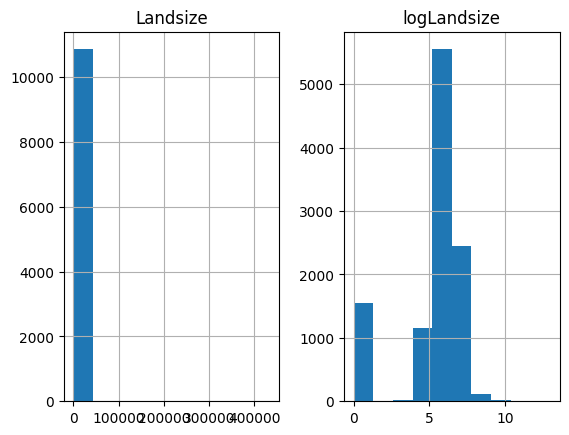

In [103]:
%matplotlib inline
train_X_logGains[['Landsize', 'logLandsize']].hist();

### Summary

Data rescaling is an important part of data preparation before applying machine learning algorithms. However, it is hard to know whether normalization or standardization of the data will improve the performance of a predictive model in advance. 

A good tip for a practical application is to create rescaled copies of your dataset and evaluate them against each other. This process can quickly show which rescaling method will improve your selected models in the problem at hand. Note that you could (and should) combine these techniques to train powerful models and apply them in real-world problems.

### Exercise 1
We can train our model using the different datasets and feature engineering techniques to evaluate their impact on the model performance. 
Print the score for the different methods we just introduced and compare them.

In [104]:
# code here

## Encoding Categorical Variables

Until now we only used numerical features for our models. However, valuable information is often encoded in categorical variables (e.g., gender, city, job).

If we simply __plug these categorial variables__ into machine learning models we will get an __error__. Hence, we need to find an appropriate preprocessing to capture the information hidden in categorical variables.

The easiest approach to deal with categorical variables is to __drop__ them from the dataset (that is what we have done before). However, this approach will only produce satisfying results if the dropped columns __did not contain useful information__.

### Label Encoding

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/label.png" style="width:60%; float:left;" />



One common approach to handle categorical variables is called label encoding. Here, we assign __each unique value to a different integer (e.g., bad = 0, neutral = 1, good = 2)__.

This assumption makes sense in this example, because there is an indisputable __ranking__ to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

For simplicity, we will drop columns with missing values for the following evaluation.

In [105]:
# Load dataset
data = pd.read_csv(melbourne_file_path)

# Drop NA
data.dropna(axis=0, inplace=True)

# Separate target from predictors
y = data['Price']
X = data.drop(['Price'], axis=1)

# Train-test split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

As we do not want to use all categorical variables we focus on those with a __limited number of categories__:

In [106]:
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                        X_train_full[cname].dtype == "object"]

print(low_cardinality_cols)

['Type', 'Method', 'Regionname']


...and combine them with the numerical variables:

In [107]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep only selected columns
cols_to_keep = low_cardinality_cols + numerical_cols
X_train = X_train_full[cols_to_keep].copy()
X_valid = X_valid_full[cols_to_keep].copy()

X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
6584,u,VB,Southern Metropolitan,6584,2,5.1,3181.0,2.0,1.0,1.0,0.0,71.0,1970.0,-37.85550,145.00180,4380.0
11369,h,S,South-Eastern Metropolitan,11369,3,38.0,3199.0,3.0,1.0,4.0,578.0,123.0,1984.0,-38.13743,145.16702,17055.0
11942,h,S,South-Eastern Metropolitan,11942,5,27.0,3196.0,5.0,5.0,4.0,570.0,243.0,1990.0,-38.03335,145.13212,2076.0
5830,u,VB,Southern Metropolitan,5830,1,6.1,3182.0,1.0,1.0,1.0,0.0,52.0,2012.0,-37.86760,144.99010,13240.0
1717,u,VB,Southern Metropolitan,1717,2,11.4,3163.0,2.0,1.0,1.0,0.0,70.0,1970.0,-37.90320,145.05550,7822.0


We can now perform label encoding on our new dataset using the functions provided by Scikit-learn. Subsequently, we can evaluate our approach by using our score_dataset utility function.

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
# Make a copy to protect original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder
label_encoder = LabelEncoder()
for col in low_cardinality_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

label_X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
6584,2,4,5,6584,2,5.1,3181.0,2.0,1.0,1.0,0.0,71.0,1970.0,-37.85550,145.00180,4380.0
11369,0,1,4,11369,3,38.0,3199.0,3.0,1.0,4.0,578.0,123.0,1984.0,-38.13743,145.16702,17055.0
11942,0,1,4,11942,5,27.0,3196.0,5.0,5.0,4.0,570.0,243.0,1990.0,-38.03335,145.13212,2076.0
5830,2,4,5,5830,1,6.1,3182.0,1.0,1.0,1.0,0.0,52.0,2012.0,-37.86760,144.99010,13240.0
1717,2,4,5,1717,2,11.4,3163.0,2.0,1.0,1.0,0.0,70.0,1970.0,-37.90320,145.05550,7822.0


In [110]:
# Evaluate performance
mae_label_encoding = score_dataset(label_X_train, label_X_valid, y_train, y_valid)
print("MAE using Label Encoding: {}".format(mae_label_encoding))

MAE using Label Encoding: 181651.9586532258


This result is considerably better than the model that relied only on numerical variables without imputation (MAE 191.669 USD).

### One-hot Encoding

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/onehot.png" style="width:70%; float:left;" />



One-hot encoding creates new binary columns indicating the presence (or absence) of each possible value in the original data.

In contrast to label encoding, one-hot encoding does __not assume an ordering__ of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data. We refer to categorical variables without an intrinsic ranking as __nominal variables__.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally __won't use__ it for variables taking on __many__ (e.g. more than 15) __different values__).

Again, we can use Scikit-learn functions to implement one-hot encodings:

In [111]:
from sklearn.preprocessing import OneHotEncoder

Let's first look at the original values of the categorial variables before their transformation:

In [112]:
X_train[low_cardinality_cols].describe()

,Type,Method,Regionname
count,4956,4956,4956
unique,3,5,8
top,h,S,Southern Metropolitan
freq,3281,3161,1724


In [113]:
# Apply one-hot encoder to each column with categorical data
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_cols_train = pd.DataFrame(one_hot_encoder.fit_transform(X_train[low_cardinality_cols]))
one_hot_cols_valid = pd.DataFrame(one_hot_encoder.transform(X_valid[low_cardinality_cols]))

# Repair index
one_hot_cols_train.index = X_train.index
one_hot_cols_valid.index = X_valid.index

Let's look at the result of the one-hot encoding:

In [114]:
one_hot_cols_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6584,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11369,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11942,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1717,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Let's train the model:

In [115]:
# Remove categorical columns and replace with one-hot encoding
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)
one_hot_X_train = pd.concat([num_X_train, one_hot_cols_train], axis=1)
one_hot_X_valid = pd.concat([num_X_valid, one_hot_cols_valid], axis=1)

print(one_hot_X_train.head())
# Evaluate performance
one_hot_encoding = score_dataset(one_hot_X_train.to_numpy(), one_hot_X_valid.to_numpy(), y_train, y_valid)
print("MAE using One-hot Encoding: {}".format(one_hot_encoding))

       Unnamed: 0  Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  \
6584         6584      2       5.1    3181.0       2.0       1.0  1.0   
11369       11369      3      38.0    3199.0       3.0       1.0  4.0   
11942       11942      5      27.0    3196.0       5.0       5.0  4.0   
5830         5830      1       6.1    3182.0       1.0       1.0  1.0   
1717         1717      2      11.4    3163.0       2.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  ...    6    7    8    9   10   11  \
6584        0.0          71.0     1970.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   
11369     578.0         123.0     1984.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
11942     570.0         243.0     1990.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
5830        0.0          52.0     2012.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   
1717        0.0          70.0     1970.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   

        12   13   14   15  
6584   0.0  1.0  0.0  0.0  
11369  1.0  0.0  0.0  0.0  
11

This is a small improvement in comparison to the label encoded data (MAE 181.652 USD).

### Exercise 2
Use standardized numeric features like in the previous section and combine it with OneHot Encoding and Label Encoding for training the model.

The final results should have two cases: 

- One-hot encoded categorical + standardized numeric
- Label encoded categorical + standardized numeric

For each of the considered categorical columns, does it make more sense to use label encoding or one-hot encoding from a data perspective?

In [ ]:
# code here

### Exercise 3
1. If we had better information on the content of the categorical variables and time permits, we would not simply use the same encoder for all columns. Look at all columns of type "object" of the full data set (e.g. at the beginning of the notebook) and think about the adequate type of encoding (label or one-hot) for each of these columns. You find a description of the variables [here](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot).
2. (Homework, optional): Retrain the model using your own, more nuanced encoding approach and try whether you can obtain a better predictive performance.

In [ ]:
# code here

## Creating Model Pipelines

Up to now, we learned how to prepare our datasets, train, tune, and evaluate powerful models. However, we wrote lots of code and functions to perform all the required tasks. Scikit-learn pipelines are a simple way to keep our data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so we can use the whole bundle as if it were a single step.

Using pipelines provides multiple benefits:
* Cleaner Code
* Fewer Bugs
* Easier to Productionize
* More Options for Model Validation

We will build a pipeline using all numerical variables as well as the low cardinatlity categorical variables

In [117]:
# Load dataset
data = pd.read_csv(melbourne_file_path)

# Separate target from predictors
y = data['Price']
X = data[cols_to_keep]

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


Writing a pipeline in Scikit-learn can be broken down into 3 steps:
1. Define preprocessing steps
2. Define the model
3. Create and evaluate the pipeline

### Define Preprocessing steps

We use the ``ColumnTransformer`` class to bundle together different preprocessing steps. To this end, we will impute missing values in the numerical columns and impute missing values and use one-hot encoding in the categorical columns.

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [119]:
# Preprocessing numerical columns
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle both preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, low_cardinality_cols)
])

### Define the Model
Next, we define a random forest model.

In [120]:
model = RandomForestRegressor(n_estimators=100, random_state=1)

### Create and Evaluate the Pipeline

Finally, we use the ``Pipeline`` class to define a pipeline that bundles the preprocessing and modeling steps.

In [121]:
# Bundle preprocessing and modeling code in a pipeline
complete_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocess the raw training data and fit the model
complete_pipeline.fit(X_train, y_train)

# Preprocess the raw validation data and make predictions
preds = complete_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print("MAE using the complete pipeline: {}".format(score))

MAE using the complete pipeline: 160307.03832842415


 There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a __single line of code__. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)
* With the pipeline, we supply the __unprocessed features in X_valid to the predict()__ command, and the pipeline __automatically preprocesses__ the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

### Exercise 4

Extend the pipeline by including the normalization step for the numerical features.

In [122]:
# code here